#### <span style="color:#0505f5;">**Importing the dependencies**</span>

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#### <span style="color:#0505f5;">**Loading the dataset**</span>

In [15]:
df_obesity = pd.read_csv("df_obesity.csv")
df_malnutrition = pd.read_csv("df_malnutrition.csv")

# <span style="color:#38bf1d;">**🍔 Obesity Table**</span>
#### <span style="color:#ed0e6f;">**1. Top 5 Regions with Highest Average Obesity Levels in 2022**</span>

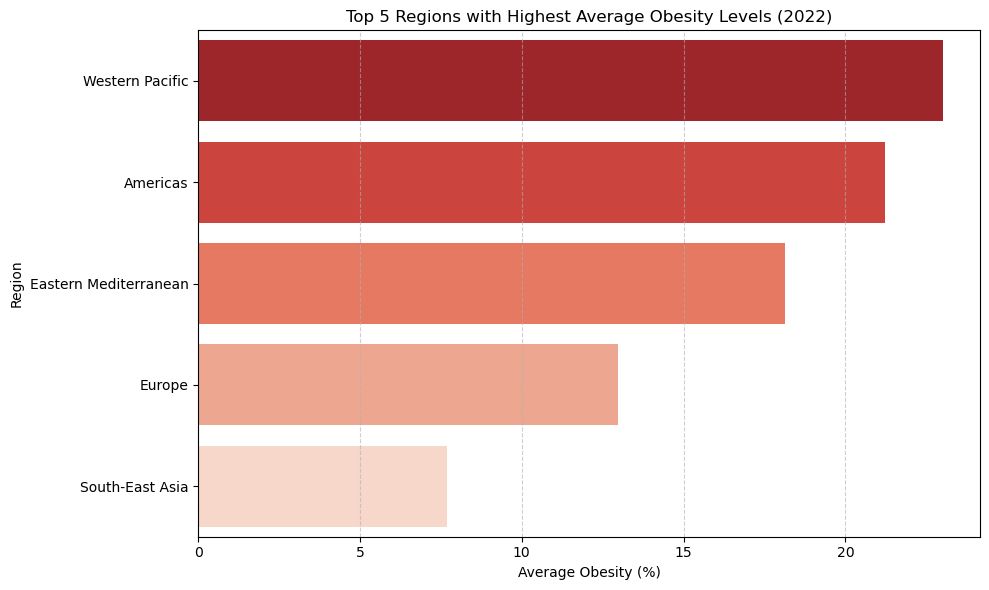

In [55]:
# Filter for the year 2022
df_2022 = df_obesity[df_obesity["Year"] == 2022]

# Group by Region and compute mean obesity
region_avg = (
    df_2022.groupby("Region")["Mean_Estimate"]
    .mean()
    .nlargest(5)
    .reset_index()
)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=region_avg, x="Mean_Estimate", y="Region", palette="Reds_r")

plt.title("Top 5 Regions with Highest Average Obesity Levels (2022)")
plt.xlabel("Average Obesity (%)")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**2. Top 5 Countries with Highest Obesity Estimates**</span>

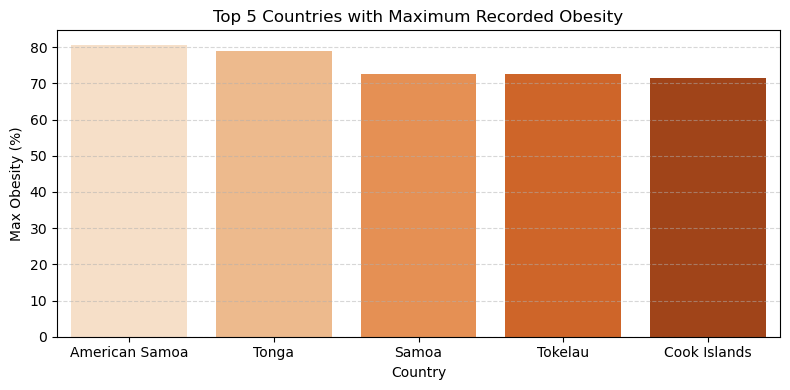

In [251]:
top5_max = df_obesity.groupby("Country")["Mean_Estimate"].max().reset_index()
top5_max = top5_max.sort_values(by="Mean_Estimate", ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=top5_max, x="Country", y="Mean_Estimate", palette="Oranges")

plt.title("Top 5 Countries with Maximum Recorded Obesity")
plt.ylabel("Max Obesity (%)")
plt.xlabel("Country")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**3.Obesity Trend in India Over the Years (Mean_Estimate)**</span>

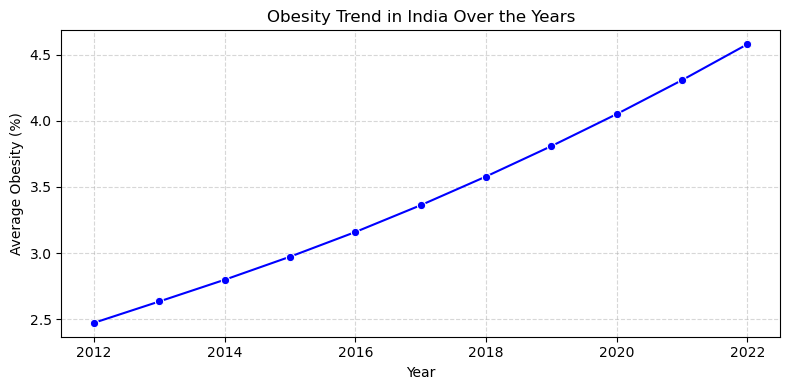

In [249]:
# Filter for India
india_data = df_obesity[df_obesity["Country"] == "India"]

# Group by year and compute mean estimate
india_trend = india_data.groupby("Year")["Mean_Estimate"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=india_trend,
    x="Year",
    y="Mean_Estimate",
    marker="o",
    color="blue"
)

plt.title("Obesity Trend in India Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Obesity (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**4. Average Obesity by Gender**</span>

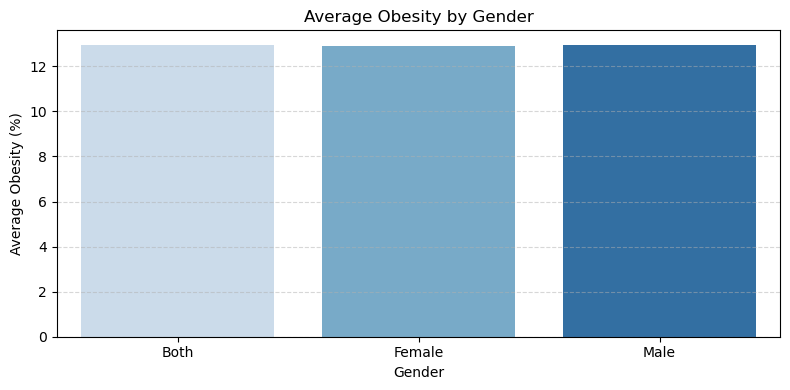

In [59]:
# Group by Gender and calculate average obesity
gender_avg = df_obesity.groupby("Gender")["Mean_Estimate"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=gender_avg,
    x="Gender",
    y="Mean_Estimate",
    palette="Blues"
)

plt.title("Average Obesity by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Obesity (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**5. Country Count by Obesity Level Category and Age Group**</span>

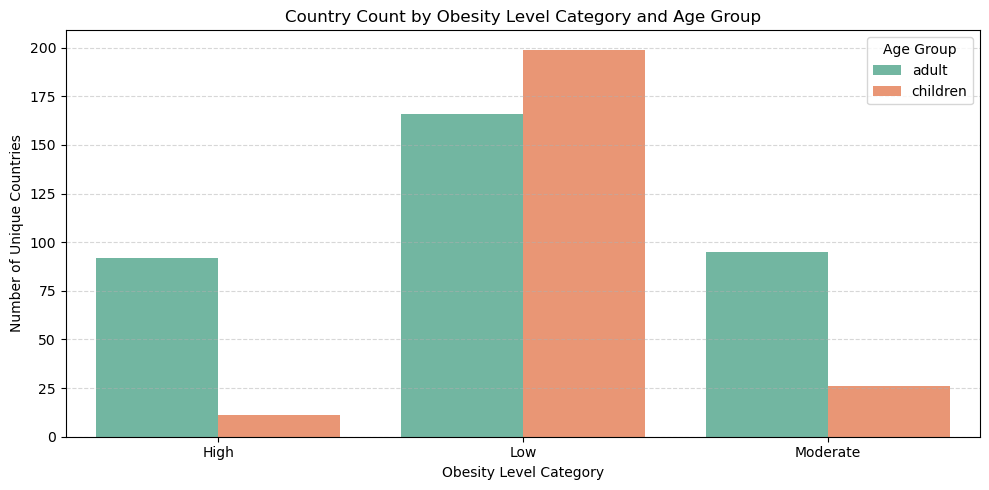

In [61]:
# Count of countries by category and age group
country_count = df_obesity.groupby(["Obesity_level", "age_group"])["Country"].nunique().reset_index()
country_count.rename(columns={"Country": "Country_Count"}, inplace=True)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=country_count,
    x="Obesity_level",
    y="Country_Count",
    hue="age_group",
    palette="Set2"
)

plt.title("Country Count by Obesity Level Category and Age Group")
plt.xlabel("Obesity Level Category")
plt.ylabel("Number of Unique Countries")
plt.legend(title="Age Group")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**6. Top 5 Least Reliable (High CI_Width) & Most Consistent (Low CI_Width) Countries**</span>

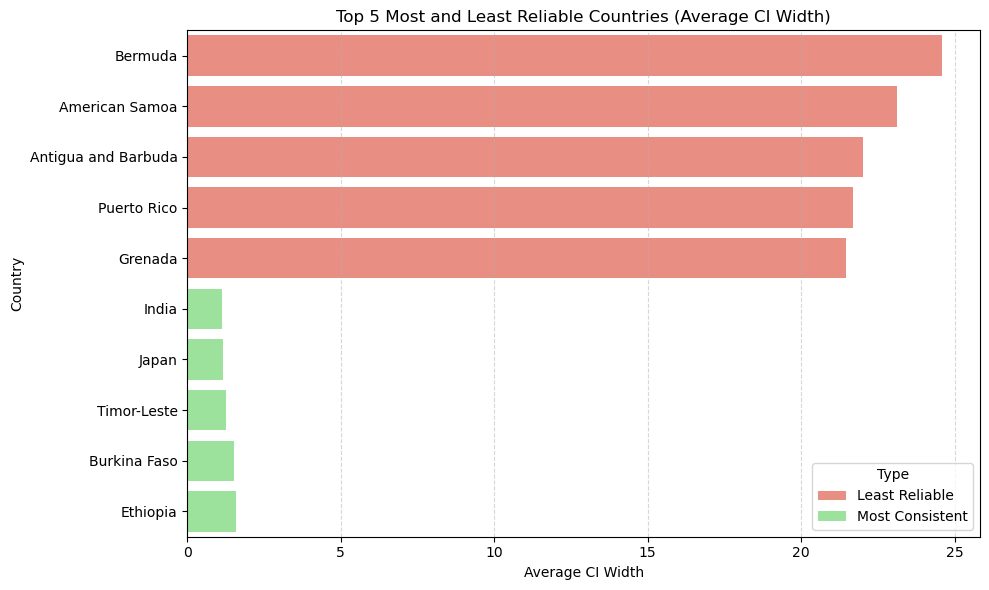

In [67]:
# Group by country and get average CI_Width
ci_width_avg = df_obesity.groupby("Country")["CI_Width"].mean().reset_index()

# Top 5 highest (least reliable)
top_wide = ci_width_avg.sort_values(by="CI_Width", ascending=False).head(5)
top_wide["Type"] = "Least Reliable"

# Top 5 lowest (most consistent)
top_narrow = ci_width_avg.sort_values(by="CI_Width", ascending=True).head(5)
top_narrow["Type"] = "Most Consistent"

# Combine
ci_compare = pd.concat([top_wide, top_narrow])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ci_compare,
    x="CI_Width",
    y="Country",
    hue="Type",
    palette={"Least Reliable": "salmon", "Most Consistent": "lightgreen"}
)

plt.title("Top 5 Most and Least Reliable Countries (Average CI Width)")
plt.xlabel("Average CI Width")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**7. Average Obesity by Age Group**</span>

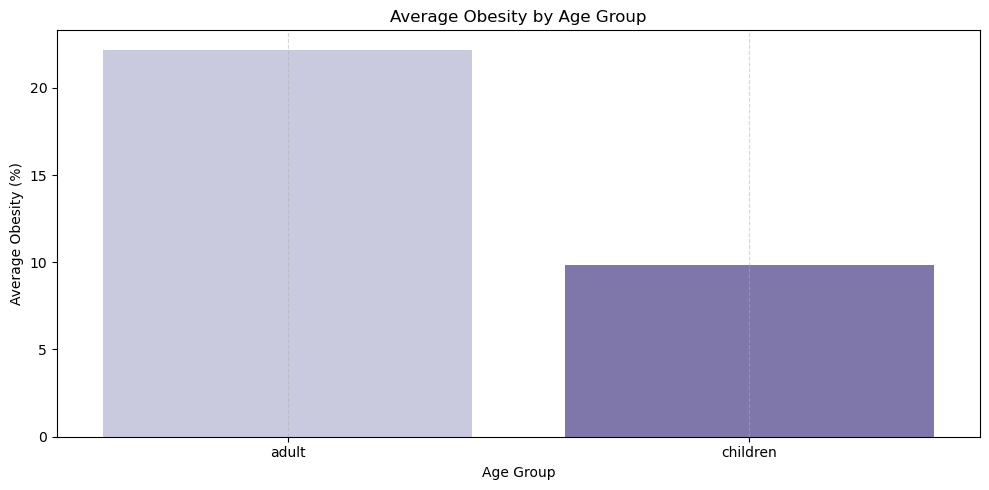

In [145]:
# Group by age group and compute average obesity
age_avg = df_obesity.groupby("age_group")["Mean_Estimate"].mean().reset_index()

# Sort for consistent ordering
age_avg = age_avg.sort_values(by="Mean_Estimate", ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=age_avg, x="age_group", y="Mean_Estimate", palette="Purples")

plt.title("Average Obesity by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Obesity (%)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**8. Top 10 Countries with Consistently Low Obesity (Low Mean + Low CI Width)**</span>

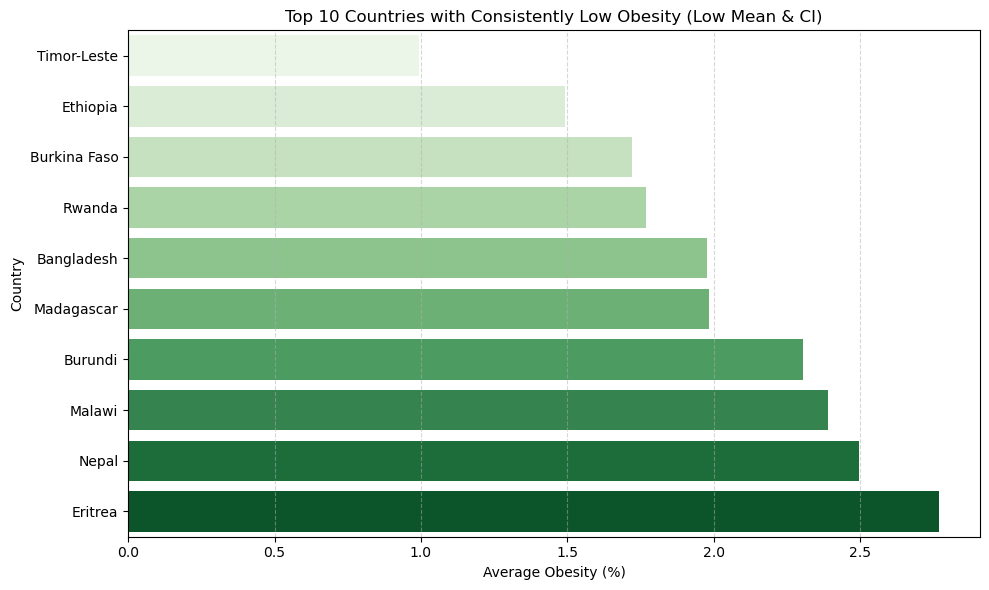

In [84]:
# Group by country and compute average obesity and CI width
country_summary = df_obesity.groupby("Country")[["Mean_Estimate", "CI_Width"]].mean().reset_index()

# Filter for countries with low obesity and low CI_Width
low_risk = country_summary.sort_values(by=["Mean_Estimate", "CI_Width"], ascending=[True, True]).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=low_risk,
    x="Mean_Estimate",
    y="Country",
    palette="Greens"
)

plt.title("Top 10 Countries with Consistently Low Obesity (Low Mean & CI)")
plt.xlabel("Average Obesity (%)")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**9. Countries Where Female Obesity Exceeds Male by Large Margin (Same Year, Same Age Group)**</span>

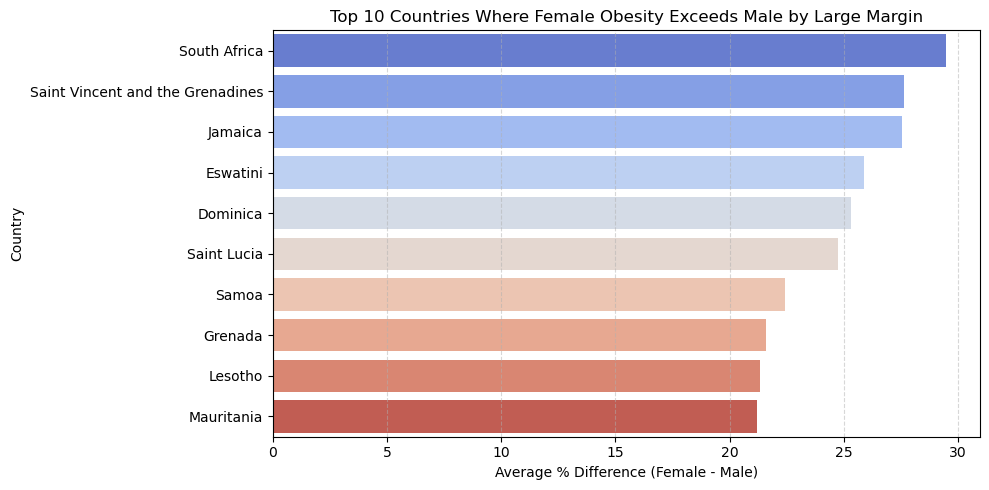

In [102]:
# Separate female and male data
female = df_obesity[df_obesity["Gender"] == "Female"]
male = df_obesity[df_obesity["Gender"] == "Male"]

# Merge on country, year, and age_group to ensure same context
merged = pd.merge(female, male, on=["Country", "Year", "age_group"], suffixes=('_female', '_male'))

# Calculate difference
merged["Difference"] = merged["Mean_Estimate_female"] - merged["Mean_Estimate_male"]

# Filter for large differences (e.g., > 10%)
large_gap = merged[merged["Difference"] > 10]

# Group by Country and get average difference
country_diff = large_gap.groupby("Country")["Difference"].mean().sort_values(ascending=False).reset_index().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=country_diff, x="Difference", y="Country", palette="coolwarm")

plt.title("Top 10 Countries Where Female Obesity Exceeds Male by Large Margin")
plt.xlabel("Average % Difference (Female - Male)", )
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**10. Global Average Obesity Percentage per Year**</span>

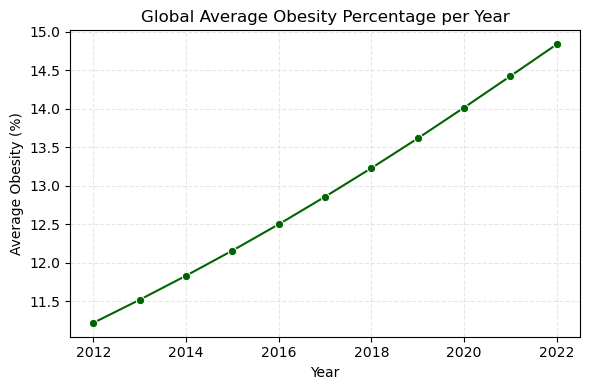

In [111]:
# Group by year and calculate global average obesity
global_trend = df_obesity.groupby("Year")["Mean_Estimate"].mean().reset_index()

# Plot
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=global_trend,
    x="Year",
    y="Mean_Estimate",
    marker="o",
    color="darkgreen"
)

plt.title("Global Average Obesity Percentage per Year")
plt.xlabel("Year")
plt.ylabel("Average Obesity (%)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# <span style="color:#38bf1d;">**👾 Malnutrition Table**</span>
#### <span style="color:#ed0e6f;">**1. Average Malnutrition by Age Group**</span>

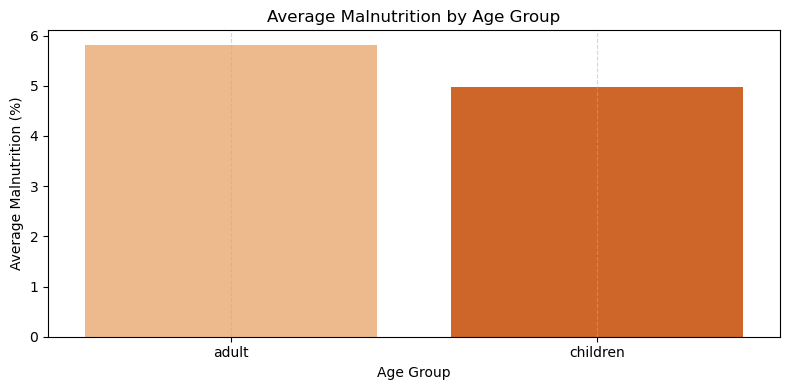

In [143]:
# Group by age group and calculate average malnutrition
age_avg_mal = df_malnutrition.groupby("age_group")["Mean_Estimate"].mean().reset_index()

# Sort for better visual clarity
age_avg_mal = age_avg_mal.sort_values(by="Mean_Estimate", ascending=False)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=age_avg_mal,
    x="age_group",
    y="Mean_Estimate",
    palette="Oranges"
)

plt.title("Average Malnutrition by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Malnutrition (%)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**2. Top 5 Countries with Highest Malnutrition (Mean_Estimate)**</span>

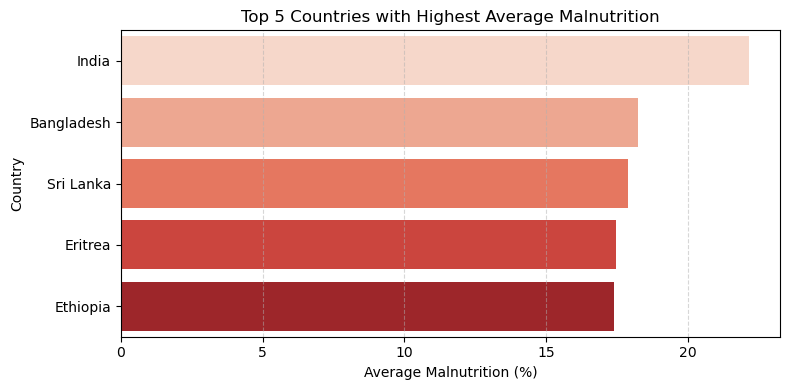

In [247]:
# Calculate average malnutrition per country
country_avg_mal = df_malnutrition.groupby("Country")["Mean_Estimate"].mean().reset_index()

# Sort and get top 5
top5_mal = country_avg_mal.sort_values(by="Mean_Estimate", ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=top5_mal,
    x="Mean_Estimate",
    y="Country",
    palette="Reds"
)

plt.title("Top 5 Countries with Highest Average Malnutrition")
plt.xlabel("Average Malnutrition (%)")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**3. Malnutrition Trend in African Region Over the Years**</span>

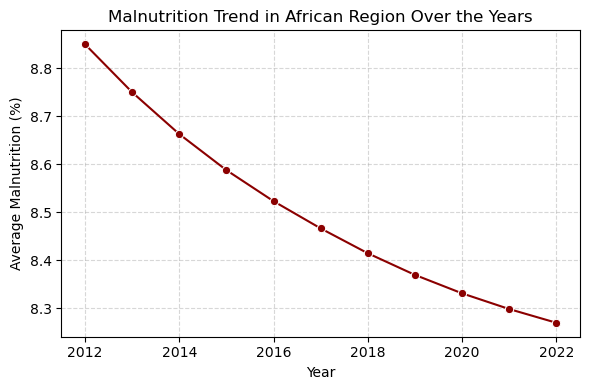

In [253]:
# Filter for African region
africa_df = df_malnutrition[df_malnutrition["Region"] == "Africa"]

# Group by year and calculate average malnutrition
africa_trend = africa_df.groupby("Year")["Mean_Estimate"].mean().reset_index()

# Plot
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=africa_trend,
    x="Year",
    y="Mean_Estimate",
    marker="o",
    color="darkred"
)

plt.title("Malnutrition Trend in African Region Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Malnutrition (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**4. Gender-Based Average Malnutrition**</span>

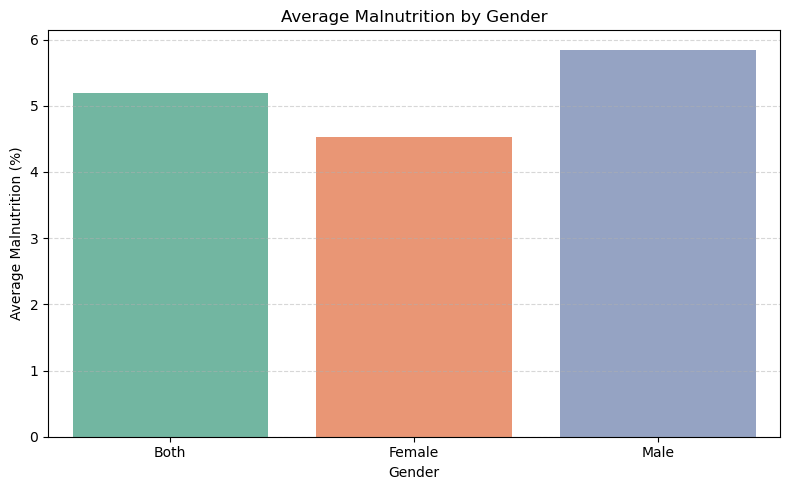

In [129]:
# Group by gender and calculate average malnutrition
gender_avg = df_malnutrition.groupby("Gender")["Mean_Estimate"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=gender_avg,
    x="Gender",
    y="Mean_Estimate",
    palette="Set2"
)

plt.title("Average Malnutrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Malnutrition (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**5. Malnutrition Level-wise (Average CI_Width by Age Group)**</span>

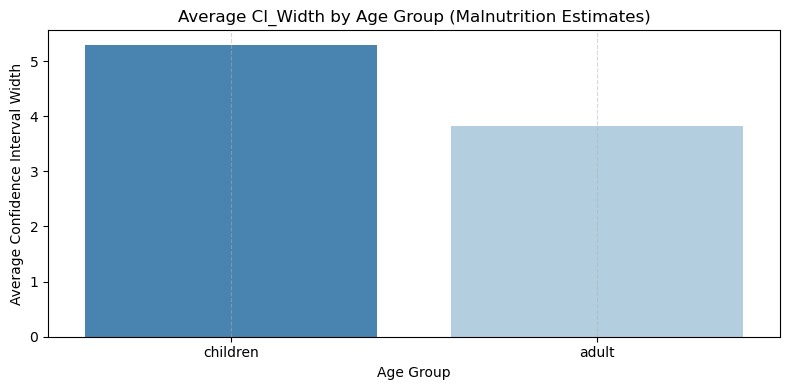

In [141]:
# Group by age group and calculate average CI_Width
ci_by_age = df_malnutrition.groupby("age_group")["CI_Width"].mean().reset_index()

# Sort for better visual clarity
ci_by_age = ci_by_age.sort_values(by="CI_Width", ascending=False)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=ci_by_age,
    x="age_group",
    y="CI_Width",
    palette="Blues_r"
)

plt.title("Average CI_Width by Age Group (Malnutrition Estimates)")
plt.xlabel("Age Group")
plt.ylabel("Average Confidence Interval Width")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**6. Yearly Malnutrition Change in Specific Countries (India, Nigeria, Brazil)**</span>

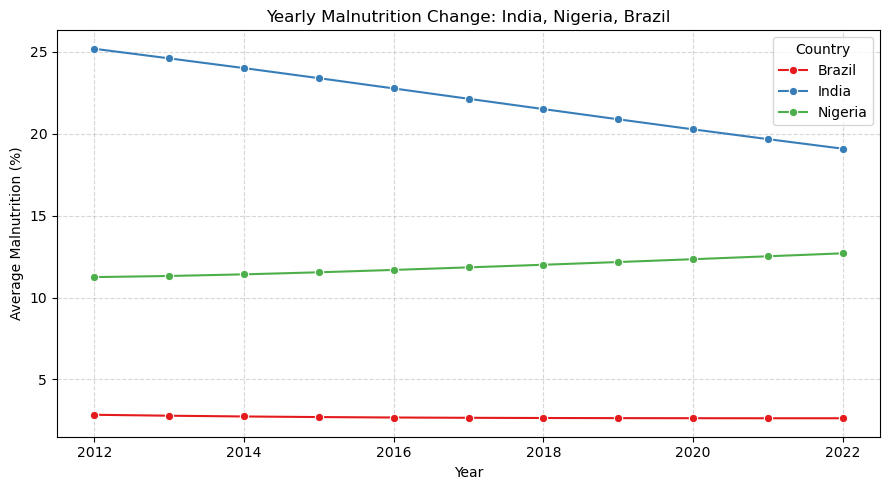

In [245]:
# Filter for the selected countries
selected_countries = ["India", "Nigeria", "Brazil"]
subset = df_malnutrition[df_malnutrition["Country"].isin(selected_countries)]

# Group by country and year
trend = subset.groupby(["Country", "Year"])["Mean_Estimate"].mean().reset_index()

# Plot
plt.figure(figsize=(9, 5))
sns.lineplot(
    data=trend,
    x="Year",
    y="Mean_Estimate",
    hue="Country",
    marker="o",
    palette="Set1"
)

plt.title("Yearly Malnutrition Change: India, Nigeria, Brazil")
plt.xlabel("Year")
plt.ylabel("Average Malnutrition (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**7. Regions with Lowest Malnutrition Averages**</span>

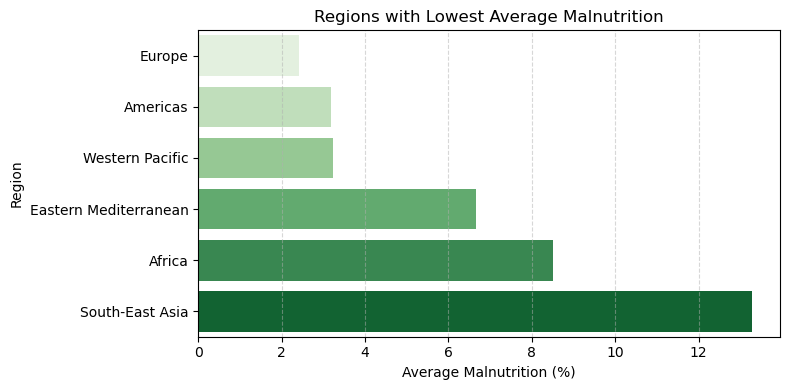

In [239]:
# Group by Region and calculate average malnutrition
region_avg = df_malnutrition.groupby("Region")["Mean_Estimate"].mean().reset_index()

# Sort by lowest malnutrition
region_avg = region_avg.sort_values(by="Mean_Estimate", ascending=True)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=region_avg,
    x="Mean_Estimate",
    y="Region",
    palette="Greens"
)

plt.title("Regions with Lowest Average Malnutrition")
plt.xlabel("Average Malnutrition (%)")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**8. Countries with Increasing Malnutrition**</span>

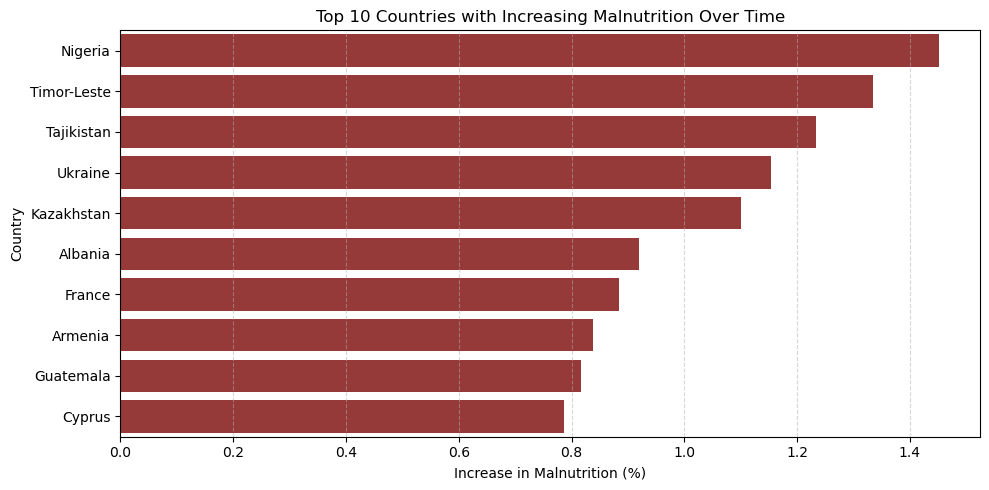

In [167]:
# Group by country and find earliest and latest estimates
min_max_df = df_malnutrition.groupby('Country').agg(Start_Year=('Year', 'min'), End_Year=('Year', 'max')).reset_index()

# Merge to get start and end year mean estimates
start = df_malnutrition.merge(min_max_df[['Country', 'Start_Year']], left_on=['Country', 'Year'], right_on=['Country', 'Start_Year'])
end = df_malnutrition.merge(min_max_df[['Country', 'End_Year']], left_on=['Country', 'Year'], right_on=['Country', 'End_Year'])

# Aggregate by country to get average of all entries in that year
start_mean = start.groupby("Country")["Mean_Estimate"].mean().reset_index(name="Start_Estimate")
end_mean = end.groupby("Country")["Mean_Estimate"].mean().reset_index(name="End_Estimate")

# Merge and compute change
change_df = pd.merge(start_mean, end_mean, on="Country")
change_df["Change"] = change_df["End_Estimate"] - change_df["Start_Estimate"]

# Filter only increasing malnutrition
increased = change_df[change_df["Change"] > 0].sort_values("Change", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=increased, x="Change", y="Country", color="brown")
plt.title("Top 10 Countries with Increasing Malnutrition Over Time")
plt.xlabel("Increase in Malnutrition (%)")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**9. Min/Max Malnutrition Levels Year-wise Comparison**</span>

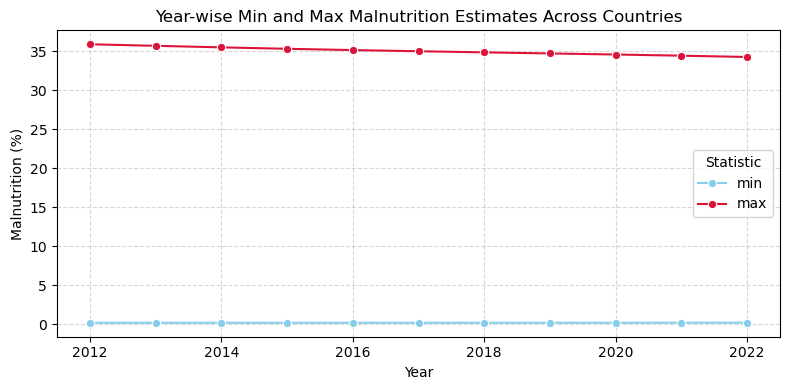

In [235]:
# Group by year and calculate min and max of mean estimates
yearly_min_max = df_malnutrition.groupby("Year")["Mean_Estimate"].agg(["min", "max"]).reset_index()

# Melt the DataFrame for side-by-side plotting
yearly_min_max_melted = pd.melt(
    yearly_min_max,
    id_vars="Year",
    value_vars=["min", "max"],
    var_name="Statistic",
    value_name="Mean_Estimate"
)

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=yearly_min_max_melted,
    x="Year",
    y="Mean_Estimate",
    hue="Statistic",
    marker="o",
    palette={"min": "skyblue", "max": "crimson"}
)

plt.title("Year-wise Min and Max Malnutrition Estimates Across Countries")
plt.xlabel("Year")
plt.ylabel("Malnutrition (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**10. High CI_Width Flags for Monitoring (CI_Width > 5)**</span>

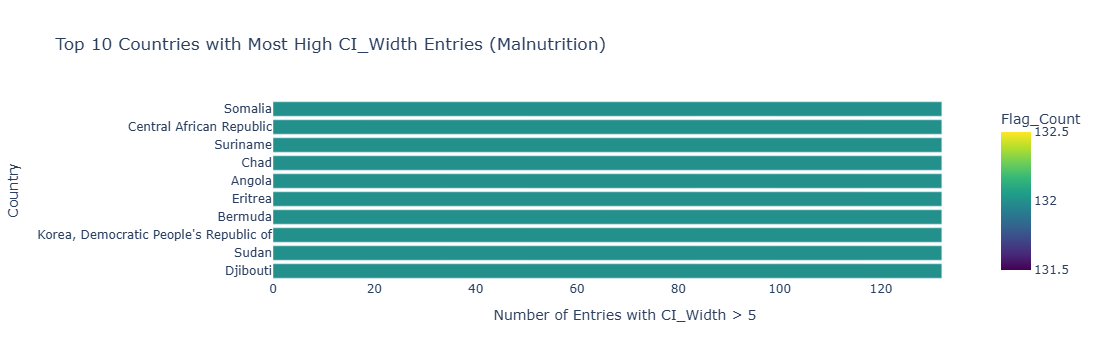

In [187]:
# Filter rows where CI_Width > 5
high_ci = df_malnutrition[df_malnutrition["CI_Width"] > 5]

# Count occurrences per country
flagged_countries = high_ci["Country"].value_counts().reset_index()
flagged_countries.columns = ["Country", "Flag_Count"]

# Get top 10 countries with the most CI_Width > 5 entries
top_flags = flagged_countries.head(10)

# Create interactive bar plot using Plotly
fig = px.bar(
    top_flags,
    x="Flag_Count",
    y="Country",
    orientation='h',
    color="Flag_Count",
    color_continuous_scale="viridis",  # Changed here
    title="Top 10 Countries with Most High CI_Width Entries (Malnutrition)"
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Number of Entries with CI_Width > 5",
    yaxis_title="Country",
    yaxis=dict(autorange="reversed"),  # Keep highest at the top
    plot_bgcolor='white'
)

fig.show()

# <span style="color:#38bf1d;">**🔗 Combined**</span>
#### <span style="color:#ed0e6f;">**1. Obesity vs Malnutrition Comparison by Country (Any 5 Countries)**</span>

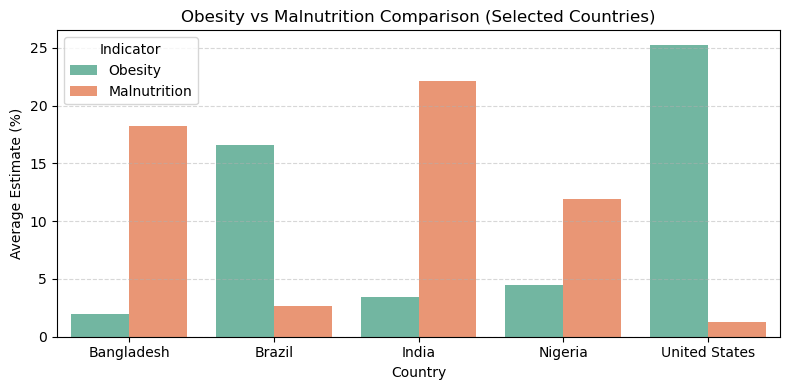

In [233]:
# Choose 5 sample countries (you can modify these)
countries = ["India", "United States", "Brazil", "Nigeria", "Bangladesh"]

# Filter and compute average estimates
obesity_avg = df_obesity[df_obesity["Country"].isin(countries)].groupby("Country")["Mean_Estimate"].mean().reset_index()
obesity_avg.rename(columns={"Mean_Estimate": "Obesity"}, inplace=True)

malnutrition_avg = df_malnutrition[df_malnutrition["Country"].isin(countries)].groupby("Country")["Mean_Estimate"].mean().reset_index()
malnutrition_avg.rename(columns={"Mean_Estimate": "Malnutrition"}, inplace=True)

# Merge the two
combined = pd.merge(obesity_avg, malnutrition_avg, on="Country")

# Melt for side-by-side bars
combined_melted = pd.melt(combined, id_vars="Country", value_vars=["Obesity", "Malnutrition"],
                          var_name="Indicator", value_name="Estimate")

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=combined_melted, x="Country", y="Estimate", hue="Indicator", palette="Set2")

plt.title("Obesity vs Malnutrition Comparison (Selected Countries)")
plt.ylabel("Average Estimate (%)")
plt.xlabel("Country")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**2. Gender-Based Disparity in Both Obesity and Malnutrition**</span>

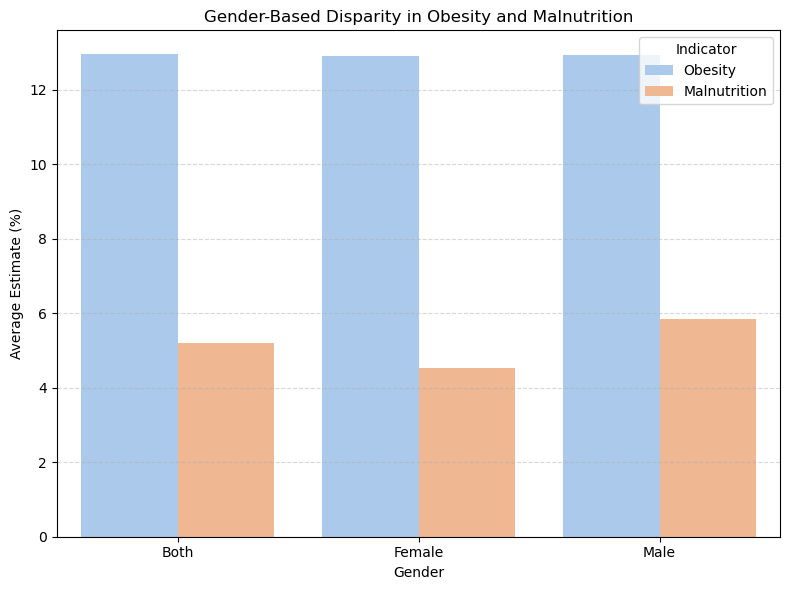

In [198]:
# Group by gender and compute global average
obesity_gender = df_obesity.groupby("Gender")["Mean_Estimate"].mean().reset_index()
obesity_gender.rename(columns={"Mean_Estimate": "Obesity"}, inplace=True)

malnutrition_gender = df_malnutrition.groupby("Gender")["Mean_Estimate"].mean().reset_index()
malnutrition_gender.rename(columns={"Mean_Estimate": "Malnutrition"}, inplace=True)

# Merge on Gender
gender_combined = pd.merge(obesity_gender, malnutrition_gender, on="Gender")

# Melt for plotting
gender_melted = pd.melt(gender_combined, id_vars="Gender", value_vars=["Obesity", "Malnutrition"],
                        var_name="Indicator", value_name="Estimate")

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_melted, x="Gender", y="Estimate", hue="Indicator", palette="pastel")

plt.title("Gender-Based Disparity in Obesity and Malnutrition")
plt.ylabel("Average Estimate (%)")
plt.xlabel("Gender")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**3. Region-wise Avg Estimates Side-by-Side (Africa and America)**</span>

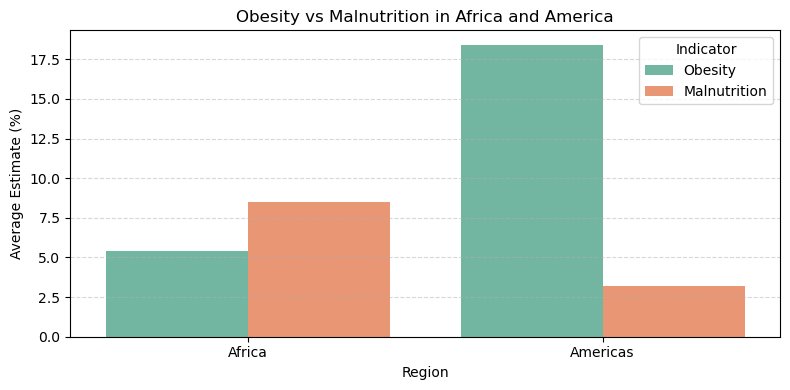

In [205]:
# Filter only Africa and America
regions_of_interest = ["Africa", "Americas"]
ob_region = df_obesity[df_obesity["Region"].isin(regions_of_interest)]
mal_region = df_malnutrition[df_malnutrition["Region"].isin(regions_of_interest)]

# Group and calculate averages
ob_avg = ob_region.groupby("Region")["Mean_Estimate"].mean().reset_index()
ob_avg.rename(columns={"Mean_Estimate": "Obesity"}, inplace=True)

mal_avg = mal_region.groupby("Region")["Mean_Estimate"].mean().reset_index()
mal_avg.rename(columns={"Mean_Estimate": "Malnutrition"}, inplace=True)

# Merge both
combined = pd.merge(ob_avg, mal_avg, on="Region")

# Melt for grouped bar plot
melted = pd.melt(combined, id_vars="Region", value_vars=["Obesity", "Malnutrition"],
                 var_name="Indicator", value_name="Estimate")

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=melted, x="Region", y="Estimate", hue="Indicator", palette="Set2")

plt.title("Obesity vs Malnutrition in Africa and America")
plt.xlabel("Region")
plt.ylabel("Average Estimate (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### <span style="color:#ed0e6f;">**4. Countries with Obesity Up & Malnutrition Down**</span>

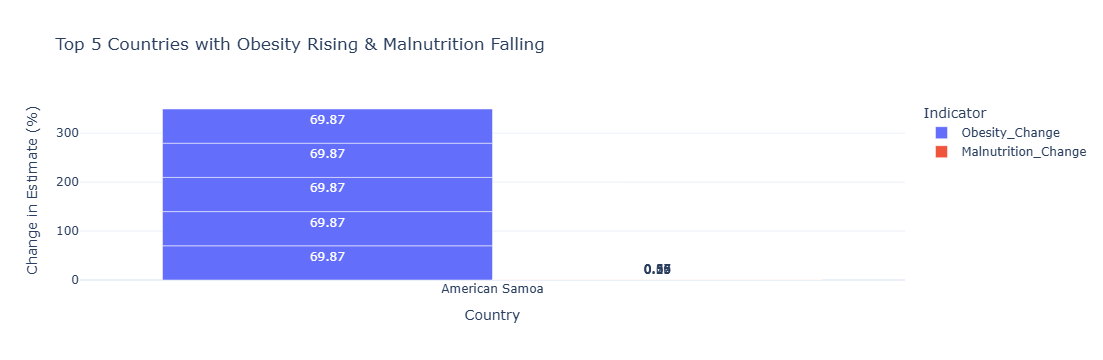

In [226]:
# OBESITY: Start vs End Year
ob_min = df_obesity.groupby("Country")["Year"].min().reset_index()
ob_max = df_obesity.groupby("Country")["Year"].max().reset_index()

ob_start = pd.merge(df_obesity, ob_min, on=["Country", "Year"])
ob_end = pd.merge(df_obesity, ob_max, on=["Country", "Year"])

ob_change = pd.merge(ob_start[["Country", "Mean_Estimate"]],
                     ob_end[["Country", "Mean_Estimate"]],
                     on="Country", suffixes=("_start", "_end"))
ob_change["Obesity_Change"] = ob_change["Mean_Estimate_end"] - ob_change["Mean_Estimate_start"]

# MALNUTRITION: Start vs End Year
mal_min = df_malnutrition.groupby("Country")["Year"].min().reset_index()
mal_max = df_malnutrition.groupby("Country")["Year"].max().reset_index()

mal_start = pd.merge(df_malnutrition, mal_min, on=["Country", "Year"])
mal_end = pd.merge(df_malnutrition, mal_max, on=["Country", "Year"])

mal_change = pd.merge(mal_start[["Country", "Mean_Estimate"]],
                      mal_end[["Country", "Mean_Estimate"]],
                      on="Country", suffixes=("_start", "_end"))
mal_change["Malnutrition_Change"] = mal_change["Mean_Estimate_start"] - mal_change["Mean_Estimate_end"]

# COMBINE & FILTER
combined = pd.merge(ob_change[["Country", "Obesity_Change"]],
                    mal_change[["Country", "Malnutrition_Change"]],
                    on="Country")

# Filter countries where obesity increased and malnutrition decreased
paradox = combined[
    (combined["Obesity_Change"] > 0) &
    (combined["Malnutrition_Change"] > 0)
]

# Sort by obesity change and take top 5
top_5 = paradox.sort_values(by="Obesity_Change", ascending=False).head(5)

# PLOT
melted = top_5.melt(id_vars="Country",
                    value_vars=["Obesity_Change", "Malnutrition_Change"],
                    var_name="Indicator", value_name="Change")

fig = px.bar(melted, 
             x="Country", 
             y="Change", 
             color="Indicator", 
             barmode="group", 
             text_auto=".2f",
             title="Top 5 Countries with Obesity Rising & Malnutrition Falling")

fig.update_layout(xaxis_title="Country",
                  yaxis_title="Change in Estimate (%)",
                  template="plotly_white")

fig.show()

#### <span style="color:#ed0e6f;">**5. Age-Wise Trend Analysis**</span>

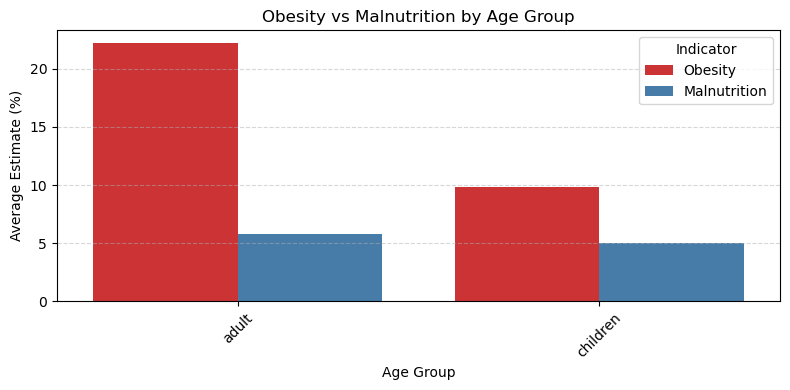

In [231]:
# Group by age group and calculate average mean estimate
ob_age = df_obesity.groupby("age_group")["Mean_Estimate"].mean().reset_index()
ob_age.rename(columns={"Mean_Estimate": "Obesity"}, inplace=True)

mal_age = df_malnutrition.groupby("age_group")["Mean_Estimate"].mean().reset_index()
mal_age.rename(columns={"Mean_Estimate": "Malnutrition"}, inplace=True)

# Merge both
age_combined = pd.merge(ob_age, mal_age, on="age_group")

# Melt for plotting
melted = pd.melt(age_combined, id_vars="age_group",
                 value_vars=["Obesity", "Malnutrition"],
                 var_name="Indicator", value_name="Estimate")

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=melted, x="age_group", y="Estimate", hue="Indicator", palette="Set1")

plt.title("Obesity vs Malnutrition by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Estimate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()